# IMAGE TRANSFORMATION

## transformation

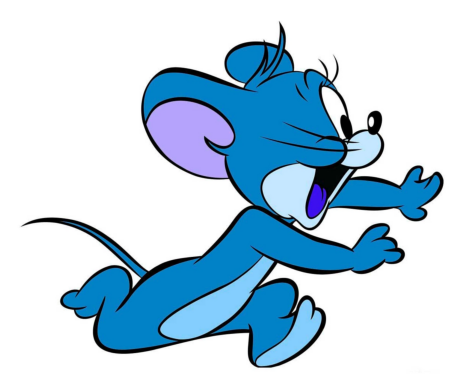

In [1]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\madhu\Downloads\tom.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

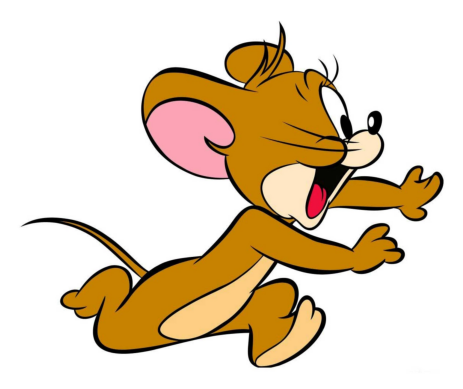

In [2]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



In [3]:
height, width = image.shape[:2]
print(height)
print(width)

1600
1920


## translation

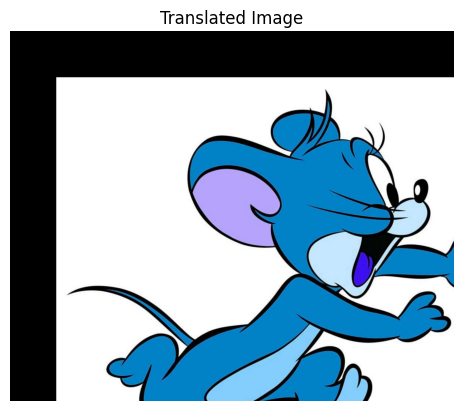

In [4]:
import numpy as np

height, width = image.shape[:2]

tx, ty = 200, 200 

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis("off")
plt.show()


## matrix based translation

In [5]:
height, width, channels = image.shape
print(height)
print(width)
print(channels)



1600
1920
3


In [6]:
tx, ty = 200, 200  

x, y = np.meshgrid(np.arange(width), np.arange(height))
print("x:",x)
print("y:",y)

x: [[   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 ...
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]]
y: [[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1597 1597 1597 ... 1597 1597 1597]
 [1598 1598 1598 ... 1598 1598 1598]
 [1599 1599 1599 ... 1599 1599 1599]]


In [7]:
flat_x = x.flatten()
flat_y = y.flatten()
print(flat_x)
print(flat_y)

[   0    1    2 ... 1917 1918 1919]
[   0    0    0 ... 1599 1599 1599]


In [8]:
ones = np.ones_like(flat_x)
original_coords = np.stack([flat_x, flat_y, ones], axis=0)
print(original_coords)

[[   0    1    2 ... 1917 1918 1919]
 [   0    0    0 ... 1599 1599 1599]
 [   1    1    1 ...    1    1    1]]


In [9]:
translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
print(translation_matrix)

[[  1   0 200]
 [  0   1 200]
 [  0   0   1]]


In [10]:
new_coords = translation_matrix @ original_coords
print(new_coords)

[[ 200  201  202 ... 2117 2118 2119]
 [ 200  200  200 ... 1799 1799 1799]
 [   1    1    1 ...    1    1    1]]


In [11]:
new_x, new_y = new_coords[:2].astype(int) 
print(new_x)
print(new_y)

[ 200  201  202 ... 2117 2118 2119]
[ 200  200  200 ... 1799 1799 1799]


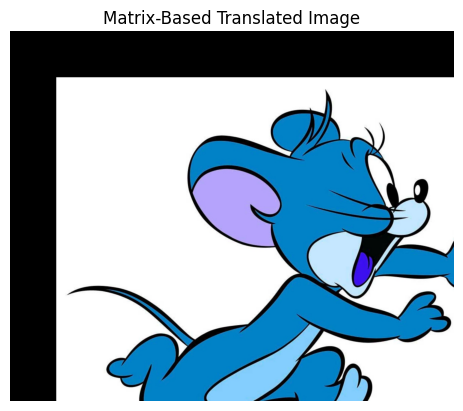

In [12]:

translated_image = np.zeros_like(image)
valid_idx = (new_x >= 0) & (new_x < width) & (new_y >= 0) & (new_y < height)

translated_image[new_y[valid_idx], new_x[valid_idx]] = image[flat_y[valid_idx], flat_x[valid_idx]]

plt.imshow(translated_image)
plt.title("Matrix-Based Translated Image")
plt.axis("off")
plt.show()


## rotation

In [13]:
height, width, channels = image.shape
print(height)
print(width)
print(channels)

1600
1920
3


In [14]:
theta = 45  
theta_rad = np.deg2rad(theta)
print(theta_rad)

0.7853981633974483


In [15]:
center_x, center_y = width // 2, height // 2
print(center_x)
print(center_y)

960
800


In [16]:
x, y = np.meshgrid(np.arange(width), np.arange(height))
print("x:",x)
print("y:",y)

x: [[   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 ...
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]]
y: [[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1597 1597 1597 ... 1597 1597 1597]
 [1598 1598 1598 ... 1598 1598 1598]
 [1599 1599 1599 ... 1599 1599 1599]]


In [17]:
flat_x = x.flatten()
flat_y = y.flatten()
print(flat_x)
print(flat_y)

[   0    1    2 ... 1917 1918 1919]
[   0    0    0 ... 1599 1599 1599]


In [18]:
centered_x = flat_x - center_x
centered_y = flat_y - center_y
print(centered_x)
print(centered_y)

[-960 -959 -958 ...  957  958  959]
[-800 -800 -800 ...  799  799  799]


In [19]:
rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                            [np.sin(theta_rad), np.cos(theta_rad)]])
print(rotation_matrix)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [20]:
rotated_coords = rotation_matrix @ np.vstack([centered_x, centered_y])
print(rotated_coords)

[[ -113.13708499  -112.42997821  -111.72287143 ...   111.72287143
    112.42997821   113.13708499]
 [-1244.50793489 -1243.80082811 -1243.09372133 ...  1241.67950776
   1242.38661454  1243.09372133]]


In [21]:
rotated_x = rotated_coords[0, :] + center_x
rotated_y = rotated_coords[1, :] + center_y
print(rotated_x)
print(rotated_y)


[ 846.86291501  847.57002179  848.27712857 ... 1071.72287143 1072.42997821
 1073.13708499]
[-444.50793489 -443.80082811 -443.09372133 ... 2041.67950776 2042.38661454
 2043.09372133]


In [22]:
rotated_x = np.round(rotated_x).astype(int)
rotated_y = np.round(rotated_y).astype(int)
print(rotated_x)
print(rotated_y)

[ 847  848  848 ... 1072 1072 1073]
[-445 -444 -443 ... 2042 2042 2043]


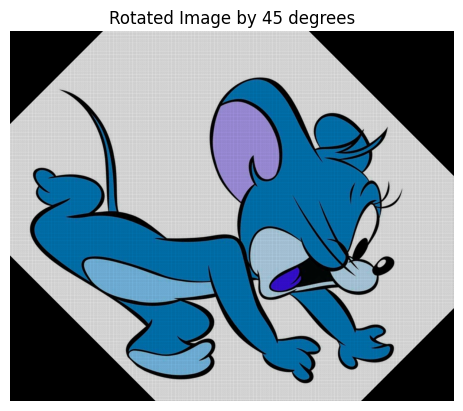

In [23]:
rotated_image = np.zeros_like(image)
valid_idx = (rotated_x >= 0) & (rotated_x < width) & (rotated_y >= 0) & (rotated_y < height)
rotated_image[rotated_y[valid_idx], rotated_x[valid_idx]] = image[flat_y[valid_idx], flat_x[valid_idx]]
plt.imshow(rotated_image)
plt.title(f"Rotated Image by {theta} degrees")
plt.axis("off")
plt.show()


## scaling

In [25]:
image = cv2.imread(r"C:\Users\madhu\Downloads\tom.jpg")
height, width, channels = image.shape
print(height)
print(width)
print(channels)

1600
1920
3


In [26]:
scale_x = 1.5 
scale_y = 1.5  
y, x = np.indices((height, width))  
print(x)
print(y)

[[   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 ...
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]]
[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1597 1597 1597 ... 1597 1597 1597]
 [1598 1598 1598 ... 1598 1598 1598]
 [1599 1599 1599 ... 1599 1599 1599]]


In [27]:
scaled_x = scale_x * (x - width // 2) + width // 2  
scaled_y = scale_y * (y - height // 2) + height // 2 
scaled_x = np.round(scaled_x).astype(int)
scaled_y = np.round(scaled_y).astype(int)
print(scaled_x)
print(scaled_y)

[[-480 -478 -477 ... 2396 2397 2398]
 [-480 -478 -477 ... 2396 2397 2398]
 [-480 -478 -477 ... 2396 2397 2398]
 ...
 [-480 -478 -477 ... 2396 2397 2398]
 [-480 -478 -477 ... 2396 2397 2398]
 [-480 -478 -477 ... 2396 2397 2398]]
[[-400 -400 -400 ... -400 -400 -400]
 [-398 -398 -398 ... -398 -398 -398]
 [-397 -397 -397 ... -397 -397 -397]
 ...
 [1996 1996 1996 ... 1996 1996 1996]
 [1997 1997 1997 ... 1997 1997 1997]
 [1998 1998 1998 ... 1998 1998 1998]]


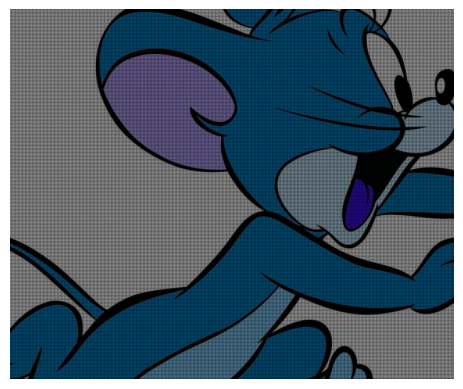

In [28]:
valid_idx = (scaled_x >= 0) & (scaled_x < width) & (scaled_y >= 0) & (scaled_y < height)

# Create an output image with the same dimensions
scaled_image = np.zeros_like(image)

# Map the scaled coordinates to the output image
scaled_image[scaled_y[valid_idx], scaled_x[valid_idx]] = image[y[valid_idx], x[valid_idx]]

# Display the scaled image
plt.imshow(scaled_image)
plt.axis('off')
plt.show()


## shearing

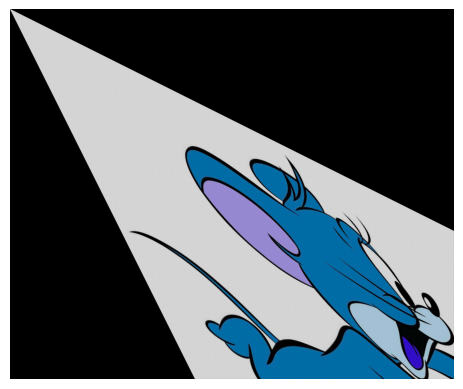

In [29]:

height, width = image.shape[:2]


sh_x = 0.5  
sh_y = 0.5  


y, x = np.indices((height, width))  


sheared_x = x + sh_x * y


sheared_y = y + sh_y * x


sheared_x = np.round(sheared_x).astype(int)
sheared_y = np.round(sheared_y).astype(int)


valid_idx = (sheared_x >= 0) & (sheared_x < width) & (sheared_y >= 0) & (sheared_y < height)


sheared_image = np.zeros_like(image)


sheared_image[sheared_y[valid_idx], sheared_x[valid_idx]] = image[y[valid_idx], x[valid_idx]]


plt.imshow(sheared_image)
plt.axis('off')
plt.show()


## reflection

In [31]:
image = cv2.imread(r"C:\Users\madhu\Downloads\tom.jpg")
height, width = image.shape[:2]
print(height)
print(width)


1600
1920


In [32]:
y, x = np.indices((height, width))
print(x)
print(y)

[[   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 ...
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]]
[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1597 1597 1597 ... 1597 1597 1597]
 [1598 1598 1598 ... 1598 1598 1598]
 [1599 1599 1599 ... 1599 1599 1599]]


In [33]:
reflected_x = width - 1 - x
print(reflected_x)

[[1919 1918 1917 ...    2    1    0]
 [1919 1918 1917 ...    2    1    0]
 [1919 1918 1917 ...    2    1    0]
 ...
 [1919 1918 1917 ...    2    1    0]
 [1919 1918 1917 ...    2    1    0]
 [1919 1918 1917 ...    2    1    0]]


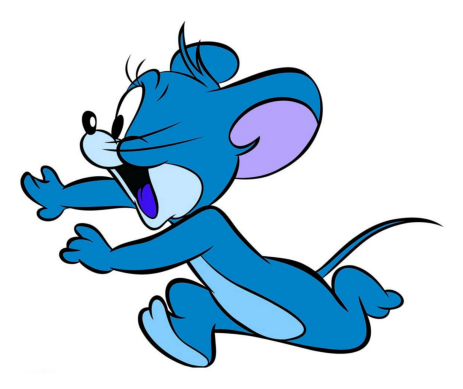

In [34]:
reflected_x = np.clip(reflected_x, 0, width - 1)
reflected_image = np.zeros_like(image)
reflected_image[y, reflected_x] = image[y, x]
plt.imshow(reflected_image)
plt.axis('off')
plt.show()
